# Step Function Example

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from mintalib.samples import sample_prices
from mintalib.indicators import SMA, EMA, EVAL, STEP

mpl.rc("figure", figsize=(12, 9))

In [4]:
prices = sample_prices()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11056 entries, 1980-12-12 to 2024-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11056 non-null  float64
 1   high    11056 non-null  float64
 2   low     11056 non-null  float64
 3   close   11056 non-null  float64
 4   volume  11056 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 518.2 KB


In [12]:
prices = prices.assign(
    sma = SMA(50),
    pos = EVAL("close > sma"),
    step = STEP(0.1, item="pos"),
)
prices



,open,high,low,close,volume,sma20,sma50,pos,step,sma
date,,,,,,,,,,
1980-12-12,0.098943,0.099373,0.098943,0.098943,469033600,NaN,NaN,0.0,NaN,NaN
1980-12-15,0.094211,0.094211,0.093781,0.093781,175884800,NaN,NaN,0.0,0.0,NaN
1980-12-16,0.087328,0.087328,0.086898,0.086898,105728000,NaN,NaN,0.0,0.0,NaN
1980-12-17,0.089049,0.089479,0.089049,0.089049,86441600,NaN,NaN,0.0,0.0,NaN
1980-12-18,0.091630,0.092061,0.091630,0.091630,73449600,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-15,233.610001,237.490005,232.369995,233.850006,64751400,227.524000,224.138625,1.0,1.0,224.138625
2024-10-16,231.600006,232.119995,229.839996,231.779999,34082200,228.078500,224.634417,1.0,1.0,224.634417
2024-10-17,233.429993,233.850006,230.520004,232.149994,32993800,228.242500,225.085868,1.0,1.0,225.085868


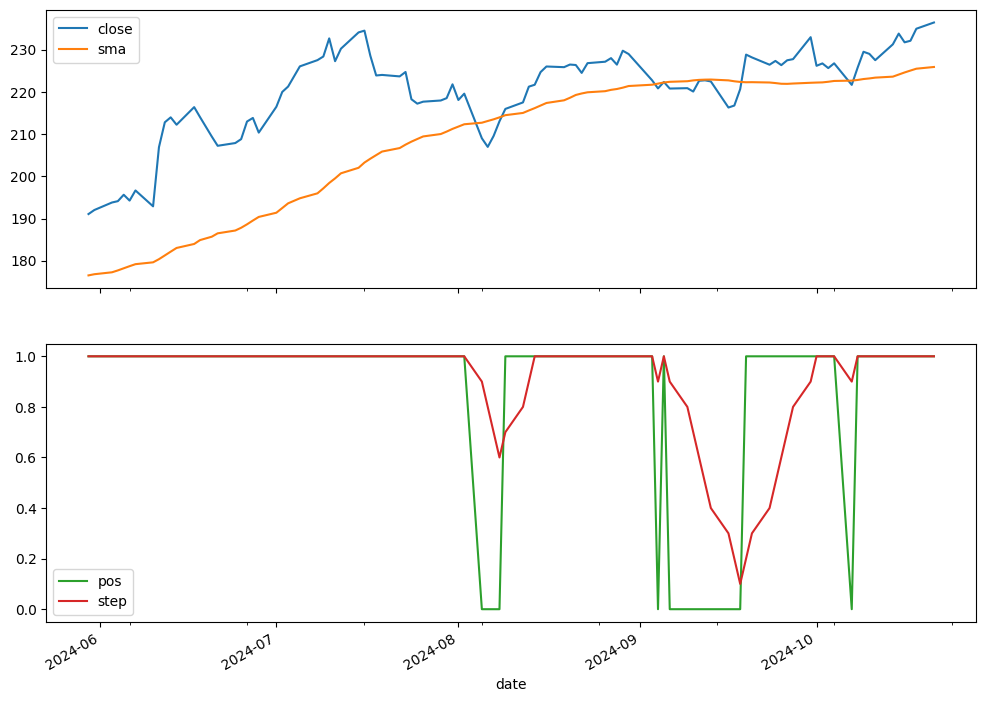

In [13]:

prices.tail(100).plot(
    y=["close", "sma", "pos", "step"],
    subplots=[["close", "sma" ], ["pos", "step"]],    
);